# Lecture 3

- Prof not here - his PhD student is lecturing all class
- Mostly writing stuff on white board

Ordinal vs Nominal Classifiers


- Ordinal contains order (ie 0 being negative sentiment and 1 being positive sentiment)
- Nominal has no order between classes (ie in colors red, orange, black, yellow, white)

Box Plots:
- The white circles outside the percentile bounds of the box plot are outliers points OUTSIDE the 95th percentile

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Week 3\Default.csv", index_col=0)
df['default_factor'] = [1 if x=='Yes' else 0 for x in df['default'].tolist()]

### If you wanted to use a linear model to predict default based on balance it might not be a good idea:

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=df[['balance']], y=df['default_factor'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

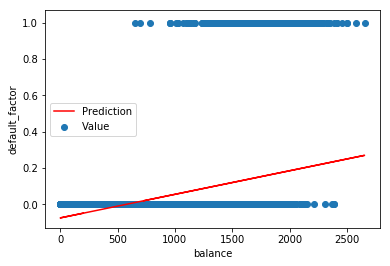

In [40]:
plt.scatter(df['balance'], df['default_factor'], label='Value')
plt.xlabel('balance')
plt.ylabel('default_factor')
plt.plot(df['balance'], model.coef_*df['balance'] + model.intercept_, color='r', label='Prediction')
plt.legend(loc='center left')

As you can see above a linear fit wouldn't accurately represent the data. ***You should use logistic regression instead***

### Logistic Regression (instead of linear)

In [98]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression()
model_logreg.fit(X=df[['balance']], y=df['default_factor'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predict Probabilities:

In [99]:
balance = df[['balance']].sort_values('balance', ascending=True)
prediction = model_logreg.predict_proba(balance)[:,1]

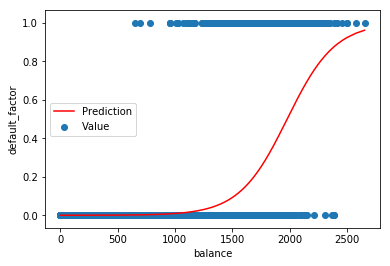

In [100]:
plt.scatter(df['balance'], df['default_factor'], label='Value')
plt.xlabel('balance')
plt.ylabel('default_factor')
plt.plot(balance, prediction, color='r', label='Prediction')
plt.legend(loc='center left')

### Predict Classes:

In [101]:
balance = df[['balance']].sort_values('balance', ascending=True)
prediction = model_logreg.predict(balance)

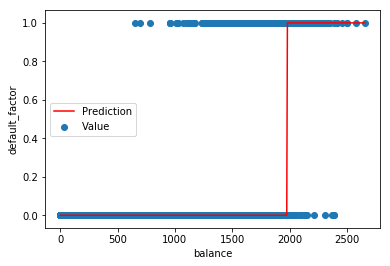

In [102]:
plt.scatter(df['balance'], df['default_factor'], label='Value')
plt.xlabel('balance')
plt.ylabel('default_factor')
plt.plot(balance, prediction, color='r', label='Prediction')
plt.legend(loc='center left')

In [106]:
observations = np.array([1000, 1500, 2000, 2500]).reshape(-1, 1)
predictions = model_logreg.predict(observations)

for i in range(0, len(observations)):
    print("Default Class of ${} Balance:".format(observations[i][0]), predictions[i])

Default Class of $1000 Balance: 0
Default Class of $1500 Balance: 0
Default Class of $2000 Balance: 1
Default Class of $2500 Balance: 1


In [107]:
from sklearn.metrics import confusion_matrix
y_pred = model_logreg.predict(df[['balance']])
confusion_matrix(df['default_factor'], y_pred)

array([[9639,   28],
       [ 246,   87]], dtype=int64)

## Lesson: Logistic Regression tends to favor over-represented class

### Remedy: Tune your thresholds

Notice below that lowering the threshold in the prediction list will push the red line to the left in the graph

[[7988 1679]
 [  26  307]]


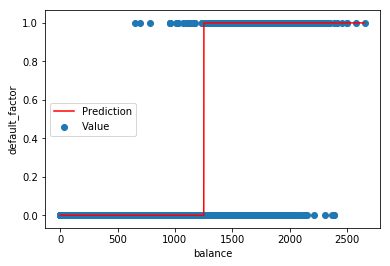

In [122]:
classification_threshold = 0.03

balance = df[['balance']].sort_values('balance', ascending=True)
prediction = np.array([1 if x[1]>classification_threshold else 0 for x in model_logreg.predict_proba(balance)])

y_pred = (model_logreg.predict_proba(df[['balance']])[:, 1] > classification_threshold)*1
print(confusion_matrix(df['default_factor'], y_pred))

plt.scatter(df['balance'], df['default_factor'], label='Value')
plt.xlabel('balance')
plt.ylabel('default_factor')
plt.plot(balance, prediction, color='r', label='Prediction')
plt.legend(loc='center left')

# Using Bayes Theorem to fix imbalanced datasets

https://en.wikipedia.org/wiki/Bayes%27_theorem

P(default|balance) = P(balance|default) * (P_default/P_balance)

## Linear discriminant analysis (handling skewed/imbalanced datasets)

https://en.wikipedia.org/wiki/Linear_discriminant_analysis

Check the elements of statistical learning book

Check LDA in sklearn: http://scikit-learn.org/stable/modules/lda_qda.html